Os dados contém informações sobre clientes abordados em uma campanha de marketing por telefone. O objetivo desta análise é criar um modelo para estimar se um cliente vai ou não fazer um depósito no banco (variável resposta denominada y).

* Variáveis: 
    - y: Se no cliente dez um depósito (Variável resposta)
    - age: Idade
    - job: Ocupação
    - marital: Estado civil (divorciado, casado ou solteiro)
    - education: Nível de educação
    - default: Se o cliente tem crédito em inadimplência
    - balance: Saldo médio anual
    - housing: Se tem empréstimo imobiliário
    - loan: Se tem empréstimo pessoal
    - contact: Tipo de contato (celular ou telefone)
    - day_of_week: Dia da semana do último contato
    - month: Mês do último contato
    - duration: Duração (em segundos) do último contato
    - campaign: Número de contatos feito com o cliente durante o período da campanha
    - pdays: Número de dias que se passaram deste o último contato em uma campanha anterior
    - previous: Número de dias que se passaram deste o último contato nesta mesma campanha
    - poutcome: Resultado da campanha anterior

In [32]:
#acessando os dados
from ucimlrepo import fetch_ucirepo 
import pandas as pd

bank_marketing = fetch_ucirepo(id=222)

X = bank_marketing.data.features 
y = bank_marketing.data.targets

X.loc[:,'pdays'] = X['pdays'].replace(-1,0)
X.loc[:,'poutcome'] = X['poutcome'].fillna("nonexistent")

df = pd.concat([y,X],axis=1)

Informações dos dados

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   y            45211 non-null  object
 1   age          45211 non-null  int64 
 2   job          44923 non-null  object
 3   marital      45211 non-null  object
 4   education    43354 non-null  object
 5   default      45211 non-null  object
 6   balance      45211 non-null  int64 
 7   housing      45211 non-null  object
 8   loan         45211 non-null  object
 9   contact      32191 non-null  object
 10  day_of_week  45211 non-null  int64 
 11  month        45211 non-null  object
 12  duration     45211 non-null  int64 
 13  campaign     45211 non-null  int64 
 14  pdays        45211 non-null  int64 
 15  previous     45211 non-null  int64 
 16  poutcome     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


visualização dos dados

In [34]:
#visualização dos dados
df.head(6)

,y,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,no,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,0,0,nonexistent
1,no,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,0,0,nonexistent
2,no,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,0,0,nonexistent
3,no,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,0,0,nonexistent
4,no,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,0,0,nonexistent
5,no,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,0,0,nonexistent


# Estatística descritiva

variáveis numéricas

In [35]:
import matplotlib.pyplot as plt
import numpy as np

numerical_variables = ["y","age","balance","duration","campaign","pdays","previous"]

display(df[numerical_variables].describe())


,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,41.015195,0.580323
std,10.618762,3044.765829,257.527812,3.098021,99.792615,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,0.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,0.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,0.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,0.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [36]:
for i in numerical_variables[1:6]:
    display(i)
    display(df.groupby('y')[i].describe())

'age'

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,40.838986,10.172662,18.0,33.0,39.0,48.0,95.0
yes,5289.0,41.670070,13.497781,18.0,31.0,38.0,50.0,95.0


'balance'

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,1303.714969,2974.195473,-8019.0,58.0,417.0,1345.0,102127.0
yes,5289.0,1804.267915,3501.104777,-3058.0,210.0,733.0,2159.0,81204.0


'duration'

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,221.182806,207.383237,0.0,95.0,164.0,279.0,4918.0
yes,5289.0,537.294574,392.525262,8.0,244.0,426.0,725.0,3881.0


'campaign'

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,2.846350,3.212767,1.0,1.0,2.0,3.0,63.0
yes,5289.0,2.141047,1.921826,1.0,1.0,2.0,3.0,32.0


'pdays'

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,37.262261,96.432053,0.0,0.0,0.0,0.0,871.0
yes,5289.0,69.342787,118.447245,0.0,0.0,0.0,98.0,854.0


A duração, números de dias entre os contatos e o saldo médio anual são as variaveis com médias maiores entre o grupo de pessoas que fizeram o depósito bancário.

variáveis categóricas

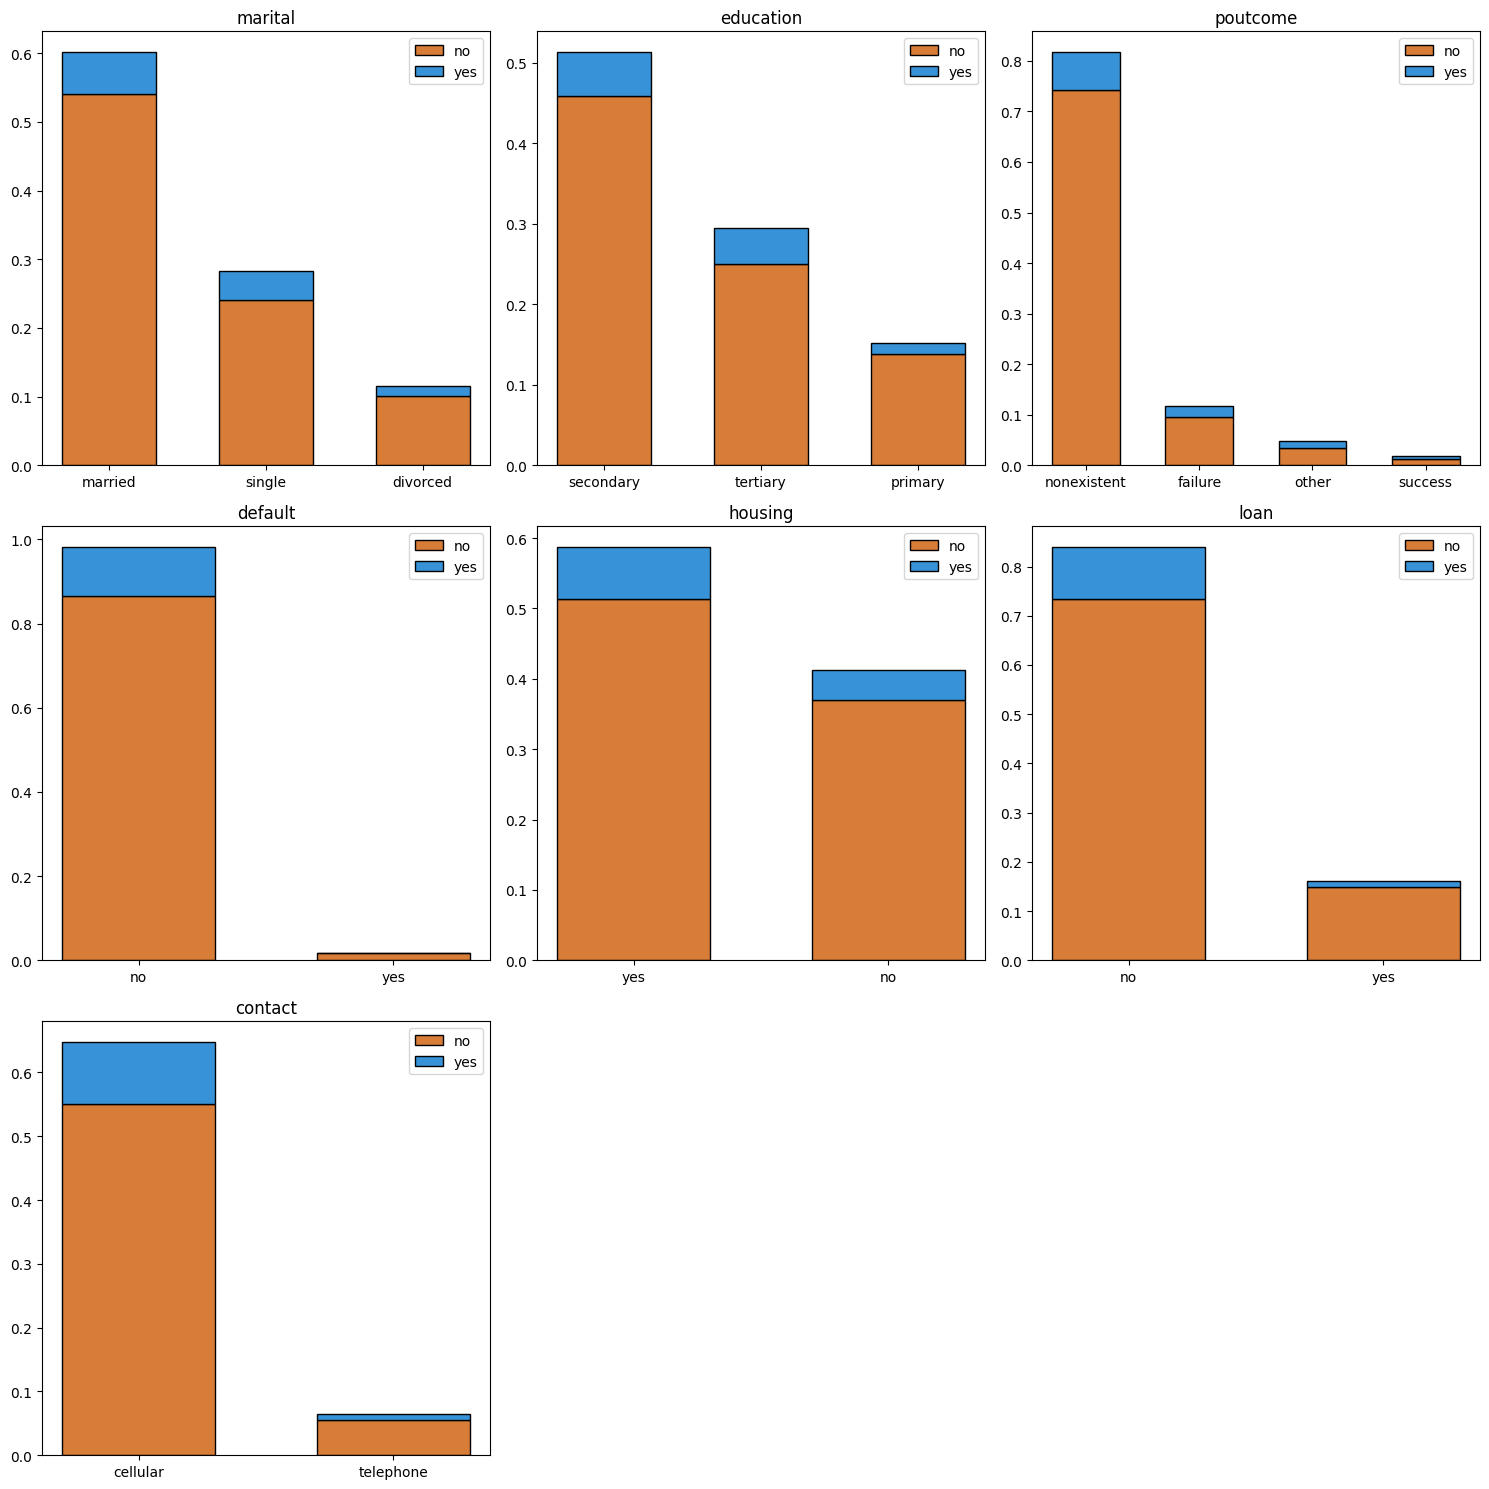

In [37]:
categorical_variables = ["marital","education","poutcome","default","housing","loan","contact"]
colors = ['#d87d37', '#3792d8']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for idx, i in enumerate(categorical_variables):
    prop = []
    freq = df.groupby('y')[i].value_counts()/len(df.index)
    for j in freq.index:
        prop.append(freq[j])

    labels = freq.index[0:int(len(prop)/2)]
    new_labels = []
    for z,name in enumerate(labels):
        new_labels.append(name[1])

    prop_no = prop[0:int(len(prop)/2)]
    prop_yes = prop[int(len(prop)/2) :]

    weight_counts = {'no':prop_no,'yes':prop_yes}
    bottom = np.zeros(len(new_labels))

    ax = axes[idx]
    bars = []
    width = 0.6
    x = np.arange(len(labels))
    for (i,(boolean, weight_count)) in enumerate(weight_counts.items()):
        bars.append(ax.bar(new_labels, weight_count, width, label=boolean, bottom=bottom,color = colors[i],edgecolor='black')) 
        bottom += weight_count
    
    ax.set_title(categorical_variables[idx])
    plt.xticks(x, new_labels)
    ax.legend(handles=[bars[0], bars[1]])

for idx in range(len(categorical_variables), len(axes)):
    fig.delaxes(axes[idx])
    
plt.tight_layout()
plt.show()

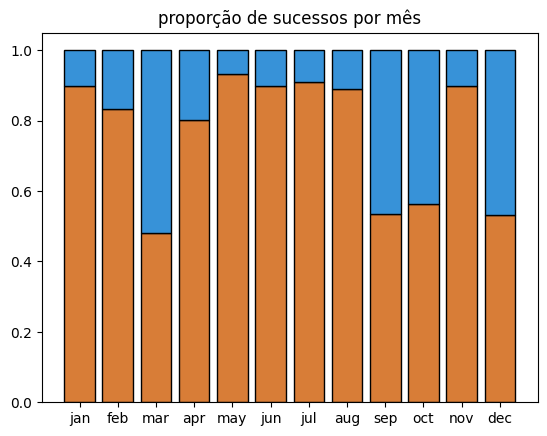

In [38]:
mounths = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
prop_no = []
prop_yes = []
colors = ['#d87d37', '#3792d8']

freq = df.groupby('y')['month'].value_counts()

for i in mounths:
    m = []
    for j in freq[:,i]:
        m.append(j)
    prop_no.append(m[0]/(m[0]+m[1]))
    prop_yes.append(m[1]/(m[0]+m[1]))

weight_counts = {'no':prop_no,'yes':prop_yes}
bottom = np.zeros(len(mounths))

fig, ax = plt.subplots()
width = 0.8
x = np.arange(len(labels))
for (i,(boolean, weight_count)) in enumerate(weight_counts.items()):
    p = ax.bar(mounths, weight_count, width, label=boolean, bottom=bottom,color = colors[i],edgecolor='black')
    bottom += weight_count
    
plt.title('proporção de sucessos por mês')
plt.show()

As maiores proporções de cliente que fizeram o depósito bancário foi nos meses de março,setembro e dezembro.

# Regressão Logística

Separando os dados em dois conjuntos: treino e teste. Vamos criar o modelo com o conjuto de treino e avaliar no de teste.

In [39]:
# separando o conjunto de teste
from sklearn.model_selection import train_test_split
from feature_engine import encoding,imputation
from sklearn import pipeline,metrics

data_copy =  df.copy()
data_copy = data_copy.drop(columns=["duration","contact"])
y_copy = data_copy["y"]
X_copy = data_copy.drop(columns=["y"])

X_train, X_test, y_train, y_test = train_test_split(X_copy, y_copy, test_size=0.2,stratify=y_copy,random_state=42)

cat_variables = ["job","marital","education","month","poutcome","default","housing","loan"]
mode = imputation.CategoricalImputer(variables = ["job","education"],imputation_method='frequent')
unknow = imputation.CategoricalImputer(variables = "contact",fill_value="unknown")
onehot = encoding.OneHotEncoder(variables=cat_variables)

my_pipeline = pipeline.Pipeline([
    ("mode",mode),
    ("onehot",onehot)
])
X_train = my_pipeline.fit_transform(X_train)#aprende e aplica os padroes
X_test = my_pipeline.transform(X_test)#so aplica os padroes

Criando o modelo

In [40]:
from sklearn.linear_model import LogisticRegression
LogisticModel = LogisticRegression(class_weight="balanced",max_iter = 20000)
LogisticModel.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=20000)

In [41]:
feature_importance = pd.DataFrame({
    #'Feature': X_train.columns,
    'Coefficient': LogisticModel.coef_[0]
})
feature_importance.index = X_train.columns
feature_importance.sort_values(by="Coefficient",key=abs,ascending=False)[0:5]

,Coefficient
poutcome_success,1.752794
month_mar,1.330671
month_oct,0.948039
month_dec,0.921138
month_jan,-0.875141


A regressão logística detectou como variaveis mais impactantes para calcular a probabilidade de sucesso se um cliente irá fazer um depósito bancário são o resutado da campanha anterior e os meses de janeiro,março,outubro e dezembro (sendo janeiro a que mais impacta em diminuir a probabilidade)

In [42]:
p = 0.5
nb_predict = LogisticModel.predict_proba(X_test)[:,1] >= p
nb_predict = np.array(list(map(lambda n :'yes' if n else'no',nb_predict)))

CM = metrics.confusion_matrix(y_test, nb_predict)
CM = pd.DataFrame(CM)
print(CM)
print("Reg losgítica  acurácia = ",metrics.accuracy_score(y_test, nb_predict))
print("Reg losgítica presição = ",metrics.precision_score(y_test, nb_predict, pos_label="yes"))
print("Reg losgítica Recall = ",metrics.recall_score(y_test, nb_predict, pos_label="yes"))

      0     1
0  6266  1719
1   427   631
Reg losgítica  acurácia =  0.7626893729956873
Reg losgítica presição =  0.26851063829787236
Reg losgítica Recall =  0.5964083175803403


A acurácia mostra que o modelo acertou 76% da variável resposta no conjunto de teste. A presição mostra que 26% das vezes que o modelo estimou como positivo ele acertou e o recall mostra que ele captou 59% de todos os casos positivos dentro do conjunto de teste. Neste caso acho importante priorizar o recall por que o objetivo e alcançar o máximo possível de clientes que aceitam fazer o depósito bancário.

# Árvore

In [43]:
from sklearn import tree

treeModel = tree.DecisionTreeClassifier(max_depth=2,class_weight="balanced")#max_depth=5 #
treeModel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2)

Critérios que o modelo da árvore usou para estimar o resultado.

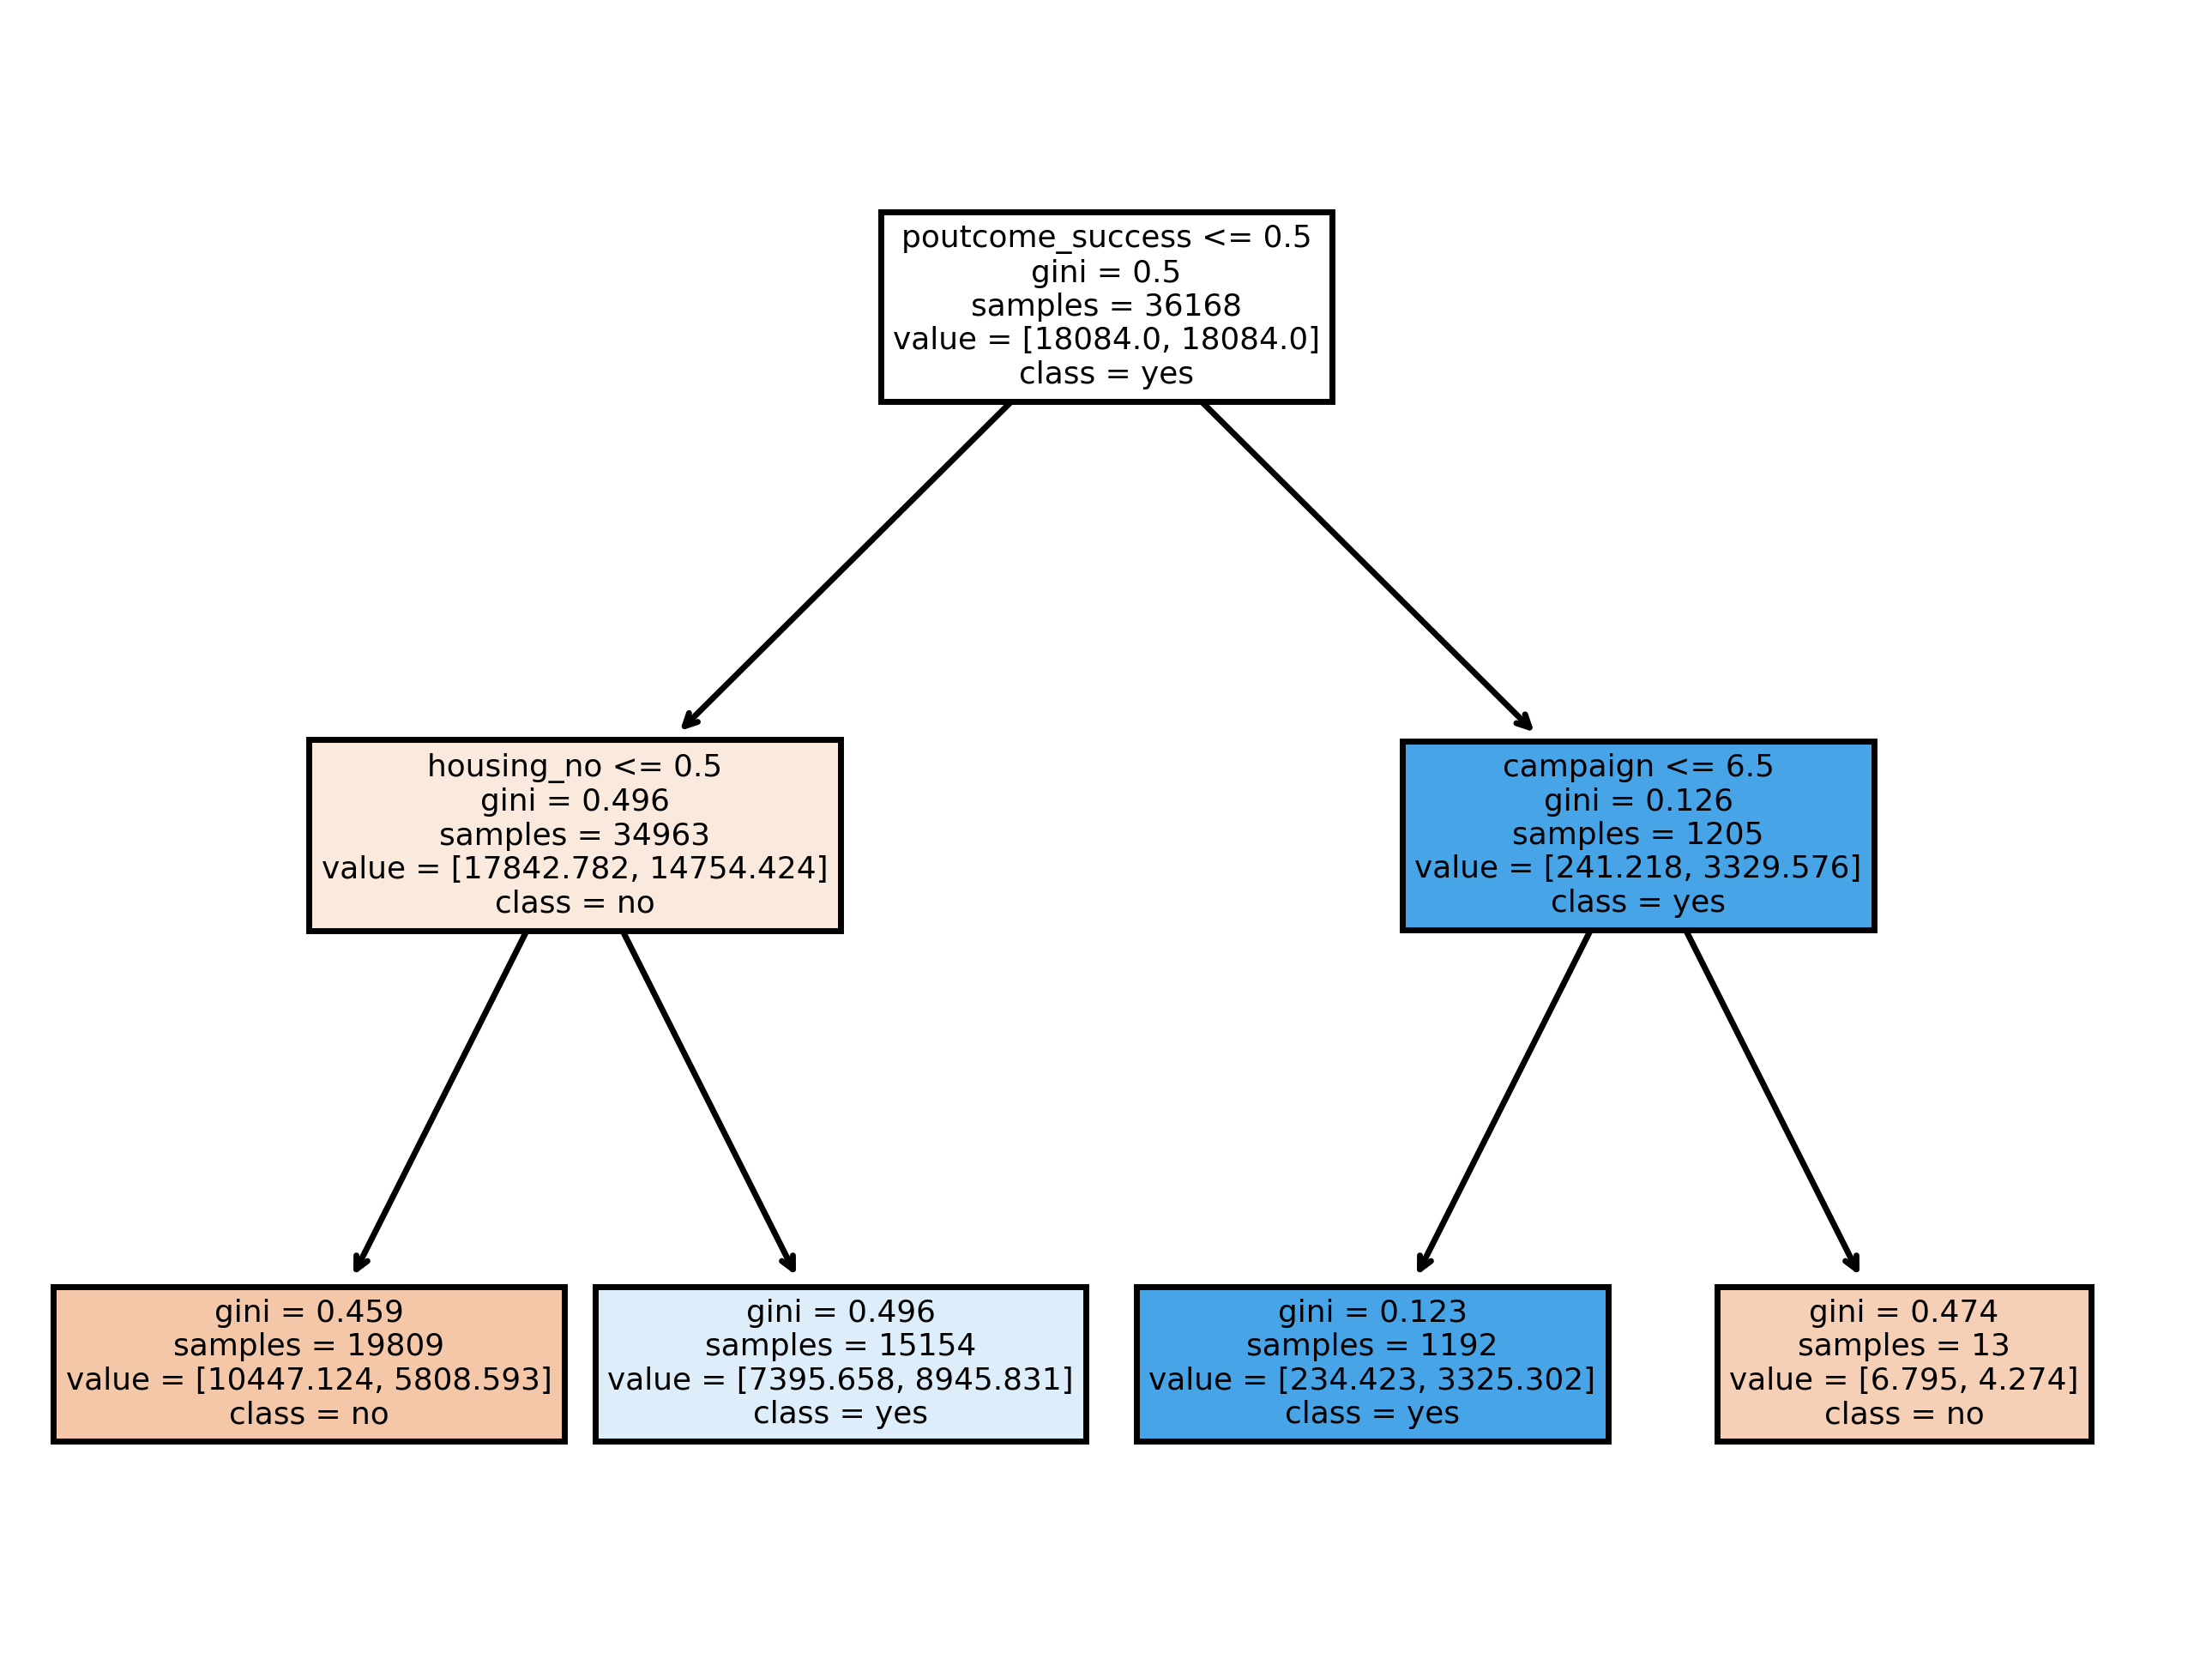

In [44]:
import matplotlib.pyplot as plt

plt.figure(dpi = 500)
tree.plot_tree(treeModel,
               class_names=treeModel.classes_,
               feature_names=X_train.columns,
               filled=True
               )
plt.show()

In [45]:
feature_importance_tree = pd.Series(treeModel.feature_importances_,index = X_train.columns).sort_values(ascending=False)
feature_importance_tree[0:5]

poutcome_success    0.713285
housing_no          0.283525
campaign            0.003190
age                 0.000000
month_sep           0.000000
dtype: float64

Para a regressão árvore as variáveis mais importantes para o critêrio de escolha são o resultado da campanha anterior e se o cliente tem crédito de habitação.

In [46]:
CM = metrics.confusion_matrix(y_test, treeModel.predict(X_test))
CM = pd.DataFrame(CM)
print(CM)
print("Reg árvore  acurácia = ",metrics.accuracy_score(y_test, treeModel.predict(X_test)))
print("Reg árvore presição = ",metrics.precision_score(y_test, treeModel.predict(X_test), pos_label="yes"))
print("Reg árvore Recall = ",metrics.recall_score(y_test, treeModel.predict(X_test), pos_label="yes"))

      0     1
0  4528  3457
1   330   728
Reg árvore  acurácia =  0.581223045449519
Reg árvore presição =  0.17395459976105138
Reg árvore Recall =  0.6880907372400756


A regressão árvore tem o melhor recall embora tenha menos acurácia e presição da regressão logística neste caso.